# Вариант 6

## Часть 1: Решение систем нелинейных уравнений
## Задачи № 4.1.6, 4.3.2, 4.5.6

## №4.1.6

### Найти с точностью 10^-6 все корни системы НЛУ:
#### f1(x1,x2) = 0
#### f2(x1,x2) = 0
### Где заданные функции:
#### cos(x1 + 0.5) + x2 - 0.8 = 0
#### sin(x2) - 2*x1 - 1.6 = 0

###
### Преобразуем первое уравнение:
#### x2 = 0.8 - cos(x1 + 0.5)
###
### Преобразуем второе уравнение:
#### x2 = arcsin(2*x1 + 1.6)

# Шаг 1.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


/var/folders/54/8zj8sdk545x43jggjff_d2hc0000gn/T/ipykernel_27076/2536604338.py:3: RuntimeWarning: invalid value encountered in arcsin
  x2_vals2 = np.arcsin(2 * x1_vals + 1.6)


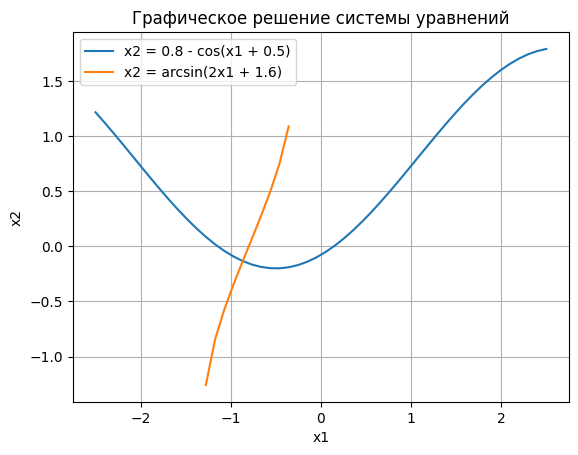

In [13]:
x1_vals = np.linspace(-2.5, 2.5)
x2_vals1 = 0.8 - np.cos(x1_vals + 0.5)
x2_vals2 = np.arcsin(2 * x1_vals + 1.6)

plt.plot(x1_vals, x2_vals1, label='x2 = 0.8 - cos(x1 + 0.5)')
plt.plot(x1_vals, x2_vals2, label='x2 = arcsin(2x1 + 1.6)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Графическое решение системы уравнений')
plt.legend()
plt.grid(True)
plt.show()

# Шаг 2.

In [23]:
def f1(x):
    return np.cos(x[0] + 0.5) + x[1] - 0.8
def f2(x):
    return np.sin(x[1]) - 2*x[0] - 1.6    

In [24]:
def newton_method(x0, tol=1e-6, max_iter=100):
    x = np.array(x0, dtype=float)
    for i in range(max_iter):
        F = np.array([f1(x), f2(x)])
        J = [[-np.sin(x[0] + 0.5), 1], [-2, np.cos(x[1])]]
        delta_x = np.linalg.solve(J, -F)
        x = x + delta_x
        if np.linalg.norm(delta_x) < tol:
            return x, i + 1
    raise Exception("Метод Ньютона не сошелся")

# Шаг 3.

In [25]:
initial_guesses = [(-1,0),(-1,1),(0,0),(1,0),(1,-1),(10,10)]
roots = []
for guess in initial_guesses:
    try:
        root, iterations = newton_method(guess)
        roots.append((root, iterations))
    except Exception as e:
        print(f"Не удалось найти корень из начального приближения {guess}: {e}")

for root, iterations in roots:
    print(f"Корень: {root}, Количество итераций: {iterations}")

Корень: [-0.86658081 -0.13355833], Количество итераций: 4
Корень: [-0.86658081 -0.13355833], Количество итераций: 5
Корень: [-0.86658081 -0.13355833], Количество итераций: 5
Корень: [-0.86658081 -0.13355833], Количество итераций: 7
Корень: [-0.86658081 -0.13355833], Количество итераций: 6
Корень: [-0.86658081 -0.13355833], Количество итераций: 10


# Шаг 4.

In [49]:
from scipy.optimize import fsolve

def equations(p):
    x1, x2 = p
    return [np.cos(x1 + 0.5) + x2 - 0.8, np.sin(x2) - 2*x1 - 1.6]

In [76]:

root = fsolve(equations, [(-1,0)], xtol=1e-6)
print(f"Корень (fsolve): {root}")

Корень (fsolve): [-0.86658081 -0.13355833]


## Получено точное решение, так как метод Ньютона является состоятельным и точным

## №4.3.2

### Найти с точностью 10^-6 все корни системы НЛУ, используя метод простой итерации для системы нелинейных уравнений:
#### f1(x1,x2) = 0
#### f2(x1,x2) = 0
### Где заданные функции:
#### x1 - 0.3 * x2 - 0.25*cos(x1) - 7.5 = 0
#### -0.05*x1 - x2 + 0.5*sin(x1) = 0

###
### Преобразуем первое уравнение:
#### x2 = 25 + 1/6 *cos(x1) - 10/3 * x1
###
### Преобразуем второе уравнение:
#### x2 = -0.05*x1 + 0.5*sin(x1)

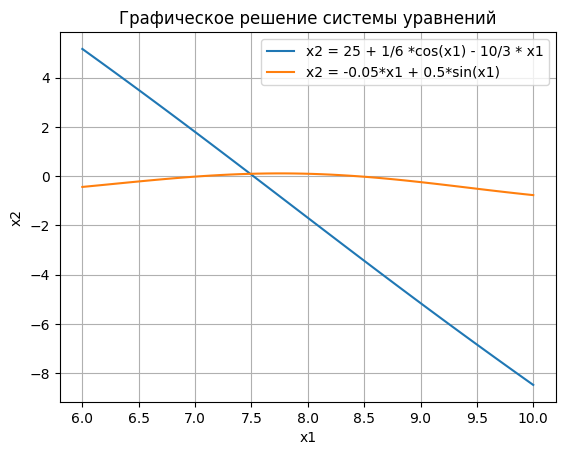

In [67]:
x1_vals = np.linspace(6, 10)
x2_vals1 = 25 +(1/6) * np.cos(x1_vals) - (10/3) * x1_vals
x2_vals2 = -0.05 * x1_vals + 0.5 * np.sin(x1_vals)

plt.plot(x1_vals, x2_vals1, label='x2 = 25 + 1/6 *cos(x1) - 10/3 * x1')
plt.plot(x1_vals, x2_vals2, label='x2 = -0.05*x1 + 0.5*sin(x1)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Графическое решение системы уравнений')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
def f1(x):
    return x[0] - 0.3*x[1] - 0.25*np.cos(x[0]) - 7.5
def f2(x):
    return -0.05*x[0] - x[1] + 0.5*sin(x[0])

### Приведём к виду:
#### x1 = 0.3*x2 + 0.25*cos(x1) + 7.5

#### x2 = -0.05*x1 + 0.5*sin(x1)

In [96]:
def g1(x1,x2): 
    return 0.3*x2 + 0.25*np.cos(x1) + 7.5
def g2(x1,x2):
    return -0.05*x1 + 0.5*np.sin(x1)

### Достаточное условие сходимости метода простой итерации требует, чтобы норма якобиана была меньше единицы

In [100]:
J1 = [-0.25*np.sin(x1), 0.3, -0.05 + 0.5*np.cos(x1), 0]

In [149]:
norm_J1 = np.linalg.norm(J1, ord=np.inf)

print(f"Норма Якобиана: {norm_J1} < 1")

Норма Якобиана: 0.3 < 1


In [98]:
def simple_iteration(p, tol=1e-6, max_iter=100):
    x1, x2 = p
    for _ in range(max_iter):
        x1_new = g1(x1, x2)
        x2_new = g2(x1, x2)
        if np.abs(x1_new - x1) < tol and np.abs(x2_new - x2) < tol:
            return np.array([x1_new, x2_new])
        x1, x2 = x1_new, x2_new
    raise Exception("Метод простой итерации не сошелся")

In [99]:
simple_iteration((8, -1))

array([7.59507956, 0.10358181])

In [82]:
def equations1(p):
    x1, x2 = p
    return [x1 - 0.3 * x2 - 0.25*np.cos(x1) - 7.5, -0.05*x1 - x2 + 0.5*np.sin(x1)]

In [84]:
print(f"Корень (fsolve): {fsolve(equations1, [(8, -1)], xtol = 1e-6)}")

Корень (fsolve): [7.59507943 0.10358184]


## Часть 2: Решение систем линейных уравнений
## Задачи № 5.1.6, 5.2

## № 5.1.6
### Дана система уравнений Ax=b. Найти решение системы с помощью метода Гаусса. Выполнить 10 итераций по методу Зейделя. Принимая решение, полученное с помощью метода Гаусса за точное, найти величину абсолютной погрешности итерационного решения.

### A = ( 7.92 3.36 -2.24 1.98
###      -13.86 18.20 0 3.96
###      -2.97 0.20 4.80 0
###      5.94 0 -10.60 16.83 )
### b = ( -1.956
###       62.8
###       -4.16
###       48.31 )

### Шаг 1.

In [224]:
A = np.array([
[7.92, 3.36, -2.24, 1.98],
[-13.86, 18.20, 0, 3.96],
[-2.97, 0.20, 4.80, 0],
[5.94, 0, -10.60, 16.83]
])

In [225]:
b = np.array(
    [-1.956, 62.8, -4.16, 48.31]
)

## Метод Гаусса

In [226]:
gauss = np.linalg.solve(A, b)
print(f"Gauss: {gauss}\n")

Gauss: [-2.02228096  1.42904531 -2.17749656  2.21276799]



### Шаг 2.

In [131]:
D = np.diag(np.diag(A)) # диагональная
U = np.triu(A, 1) # верхнедиаг
L = np.tril(A, -1) # нижнедиаг
A == D + U + L

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

### (D + U + L)x = b
### Dx = (b - (U + L)x)
### x = D-1 (b - (U + L)x)
### x = - D-1 (U+L)x + D-1.b 

In [128]:
D

array([[ 7.92,  0.  ,  0.  ,  0.  ],
       [ 0.  , 18.2 ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  4.8 ,  0.  ],
       [ 0.  ,  0.  ,  0.  , 16.83]])

In [129]:
U

array([[ 0.  ,  3.36, -2.24,  1.98],
       [ 0.  ,  0.  ,  0.  ,  3.96],
       [ 0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ]])

In [130]:
L

array([[  0.  ,   0.  ,   0.  ,   0.  ],
       [-13.86,   0.  ,   0.  ,   0.  ],
       [ -2.97,   0.2 ,   0.  ,   0.  ],
       [  5.94,   0.  , -10.6 ,   0.  ]])

In [144]:
B = -np.linalg.inv(D).dot(L + U)

In [145]:
B

array([[-0.        , -0.42424242,  0.28282828, -0.25      ],
       [ 0.76153846, -0.        , -0.        , -0.21758242],
       [ 0.61875   , -0.04166667, -0.        , -0.        ],
       [-0.35294118, -0.        ,  0.62982769, -0.        ]])

In [150]:
print(f"Норма B: {np.linalg.norm(B, ord=np.inf)} < 1")

Норма B: 0.9827688651218064 < 1


### Шаг 3.

In [261]:
def zeid(A, b, x0):
    x = np.copy(x0)
    for it in range(10):
        x_n = np.copy(x)
        
        for i in range(4):
            b1 = 0
            b2 = 0
            for j in range(i):
                b1 += A[i][j] * x_n[j]
            for j in range(i + 1, 4):
                b2 += A[i][j] * x[j]
            x_n[i] = (b[i] - b1 - b2) / A[i][i] 
        x = x_n
    return x    

In [262]:
x_z = zeid(A, b, np.zeros(len(b)))

In [263]:
x_z

array([-2.02228129,  1.42904505, -2.17749676,  2.21276799])

In [244]:
abs_error = np.linalg.norm(x_z - gauss, ord=np.inf)
print("Абсолютная погрешность:", abs_error)

Абсолютная погрешность: 1.1774965633310632


### Шаг 4.

In [265]:
x_z1 = zeid(A, b, np.ones(len(b)))

In [266]:
x_z1

array([-2.02228119,  1.42904513, -2.1774967 ,  2.21276799])

In [267]:
abs_error = np.linalg.norm(x_z1 - gauss, ord=np.inf)
print("Абсолютная погрешность:", abs_error)

Абсолютная погрешность: 2.3088997735953853e-07


### Метод Зейделя находит верные решения системы, которые совпадают с корнями, найденными при помощи встроенного пакета numpy.linalg.

### Разная точность может быть достигнута за 10 итераций из-за выбора начального приближения

## № 5.2
### Для системы уравнений Ax=b из задачи 5.1 найти решение по методу Зейделя с точностью 10^-6, взяв любое начальное приближение.

In [329]:
def zeid1(A, b, x0):
    x = np.copy(x0)
    while True:
        it = 0
        x_n = np.copy(x)
        
        for i in range(4):
            b1 = 0
            b2 = 0
            for j in range(i):
                b1 += A[i][j] * x_n[j]
            for j in range(i + 1, 4):
                b2 += A[i][j] * x[j]
            x_n[i] = (b[i] - b1 - b2) / A[i][i] 
            it+=1
        if np.linalg.norm(x - x_n, ord=np.inf) < 1e-6:
            break
        x = x_n
    return x, it    

In [330]:
x_z2, it = zeid1(A, b, np.zeros(len(b)))

In [331]:
print(f"Решение методом Зейделя с точностью 1e-6: {x_z2}, \nКоличество итераций: {it}")

Решение методом Зейделя с точностью 1e-6: [-2.02228129  1.42904505 -2.17749676  2.21276799], 
Количество итераций: 4


In [332]:
abs_error = np.linalg.norm(x_z2 - gauss, ord=np.inf)
print("Абсолютная погрешность:", abs_error)

Абсолютная погрешность: 3.3593057358061174e-07
